In [1]:
#dosyayı data frame'e yüklüyoruz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv('titanic_data.csv')

In [2]:
titanic2=titanic.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.set_index('PassengerId',inplace=True) #PassengerId index yaptık
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Burası veri tiplerini ayarlamak içindi ama gerek olmayacak gibi
def parse_int(i):
    if i == '':
        return None
    else:
        return int(float(i))
    
def parse_float(i):
   
    if i == '':
        return None
    else:
        return float(i)

### EDA

In [5]:
titanic['Age'].mean() #deneme

29.69911764705882

In [6]:
titanic.loc[1,'Survived']

0

In [7]:
titanic.groupby('Sex').sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [8]:
titanic2['Survived'].sum()

342

In [9]:
titanic.groupby('Survived').sum()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,1390,12985.50,304,181,12142.7199
1,667,8219.67,162,159,16551.2294


### Koda devam

In [10]:
erkek= titanic[titanic['Sex'] != 'female']# kadın ve erkekleri tanımlıyoruz
kadın= titanic[titanic['Sex'] != 'male']
ölü_erkek=erkek[erkek['Survived'] !=1 ]
sağ_erkek=erkek[erkek['Survived'] !=0 ]
ölü_kadın=kadın[kadın['Survived'] !=1 ]
sağ_kadın=kadın[kadın['Survived'] !=0 ]
ölenler=titanic[titanic['Survived'] !=1 ]
ölenler.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [11]:
cinsiyet = titanic.groupby('Sex',as_index=False).sum() #Cinsiyetlere göre gruplandırdık
cinsiyet

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,233,678,7286.00,218,204,13966.6628
1,male,109,1379,13919.17,248,136,14727.2865


### Gemidekilerin cinsiyet dağılımı

In [12]:
def cinsiyet_dağılımı(title,size1,size2,label1,label2):
    labels = [label1, label2]
    sizes = [size1,size2]
    explode = (0.1,0)
    plt.title(title)
    plt.pie(sizes, explode=explode, labels=labels,shadow = True,startangle=70,autopct='%1.1f%%')
    plt.show()

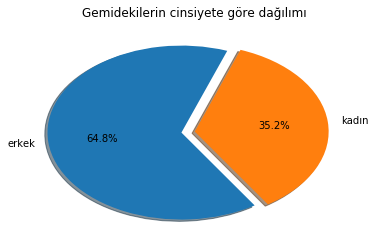

In [13]:
cinsiyet_dağılımı('Gemidekilerin cinsiyete göre dağılımı',len(erkek),len(kadın),'erkek','kadın')

SONUÇ: Gemidekilerin %64.8i erkek, %35.2si kadınmış

### SORU 1. Ölenlerin cinsiyet dağılımı
Ölenlerin erkeklerde ve kadınlarda oranını bulacağız

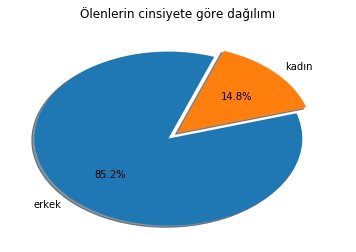

In [14]:
cinsiyet_dağılımı('Ölenlerin cinsiyete göre dağılımı',len(ölü_erkek),len(ölü_kadın),'erkek','kadın')

SONUÇ: Ölenlerden %85.2 si erkek, %14.8 i kadınmış.

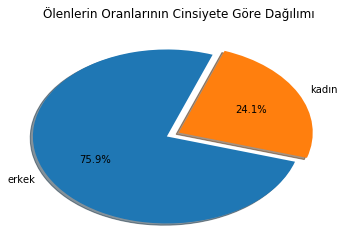

In [15]:
cinsiyet_dağılımı('Ölenlerin Oranlarının Cinsiyete Göre Dağılımı',len(ölü_erkek)/len(erkek),len(ölü_kadın)/len(kadın),'erkek','kadın')

SONUÇ: Erkeklerin ölüm oranı ile kadınların ölüm oranı karşılaştırması sonucu erkek ölüm oranının kadın ölüm oranının 3 katı olduğu gözlendi. Bu da kadınların gemiyi önce terketmesinden kaynaklandığından olabilir. 

### SORU 8. Erkek ve kadınların ölüm oranları
Erkeklerde ve kadınlarda ölüm oranını bulacağız

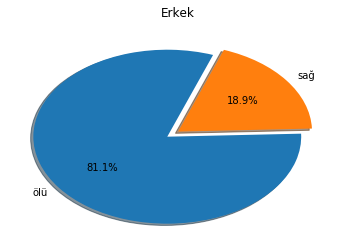

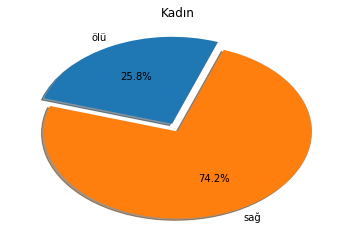

In [16]:
cinsiyet_dağılımı('Erkek',len(ölü_erkek),len(sağ_erkek),'ölü','sağ')
cinsiyet_dağılımı('Kadın',len(ölü_kadın),len(sağ_kadın),'ölü','sağ')

SONUÇ: Kadınlara gemiden ayrılırken öncelik tanınması, onların daha fazla oranda hayatta kalmasını sağlamıştır.

### Cinsiyetlerin Plotlanması ve analizi

In [17]:
def karma(title,label1,label2,size1,size2,labelgender,sizegender):
    labels = [label1,label2]
    sizes = [size1,size2]
    explode = (0.1,0)
    colors = ['#c2c2f0','#ffb3e6']

    labels_gender = labelgender
    sizes_gender = sizegender
    colors_gender = ['#ff6666','#99ff99', '#ff6666','#99ff99']
    explode_gender= (0.1,0.2,0.1,0.1) 
    # Plot
    plt.title(title)
    plt.pie(sizes, labels=labels,explode=explode, colors=colors, startangle=90,frame=True,autopct='%1.1f%%',shadow=True,labeldistance=0.8,pctdistance=1.1)
    plt.pie(sizes_gender, labels=labels_gender,explode= explode_gender, colors=colors_gender,radius=0.8,autopct='%1.1f%%',startangle=90,labeldistance=0.6,pctdistance=0.9)

    plt.tight_layout()
    plt.show()

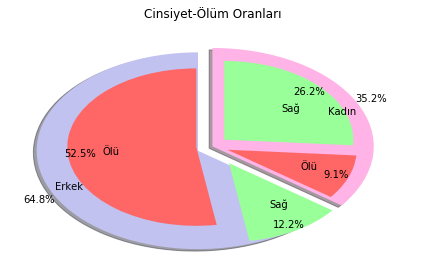

In [18]:
karma('Cinsiyet-Ölüm Oranları','Erkek','Kadın',len(erkek),len(kadın),['Ölü','Sağ','Ölü','Sağ'],[len(ölü_erkek),len(sağ_erkek),len(ölü_kadın),len(sağ_kadın)])

Ölen erkekler gemideki nüfusun %52.5 ini oluşturmuş. Kurtulan kadınların fazlalığı göze çarpıyor. Bu tablo aşağıdaki gibi de yapılabilir

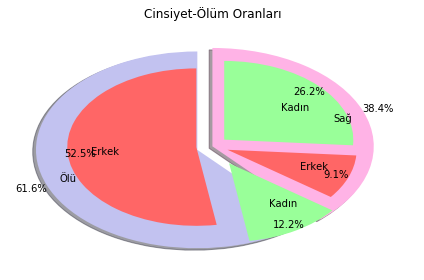

In [19]:
karma('Cinsiyet-Ölüm Oranları','Ölü','Sağ',len(ölü_erkek)+len(ölü_kadın),len(sağ_erkek)+len(sağ_kadın),['Erkek','Kadın','Erkek','Kadın'],[len(ölü_erkek),len(sağ_erkek),len(ölü_kadın),len(sağ_kadın)])

SONUÇ: Toplam mevcudun % 61.6 sı ölmüş. Bunların % 85.2 si erkek (yukarıdaki tablodan).

### SORU 3. Ölenlerin yaş aralığı

Yaş aralıkları aşağıdaki kategoride değerlendirildi: 
                 1. 18 yaş altı - A
                 2. 18-30 - B
                 3. 30-45 - C
                 4. 45-65 - D
                 5. 65 üzeri - E
                 6. Yaş bilgisi yok - F

In [20]:
def yaş_aralığı(veri):
 
    A,B,C,D,E,F = 0,0,0,0,0,0
    for yaş in veri['Age']:
        
        if yaş < 18:
            A+=1
        
        elif yaş < 30:
            B +=1
        
        elif yaş < 45:
            C +=1
        
        elif yaş < 65:
            D +=1
            
        elif 65 <= yaş:
            E +=1
        
        else:
            F +=1
    
    G= A+B+C+D+E+F     
    return [A,B,C,D,E,F,G]

In [21]:
def yaş_dağılımı_plot(yaş_dağılımı,title):
      
    yaş_dağılımı2=yaş_dağılımı.copy()
    yaş_dağılımı2.drop(yaş_dağılımı2.columns[[-1]], axis=1, inplace=True)#Total sütununu sildik. Bunu del yaş_dağılımı2.loc['Total] ile de yapabiliriz

    yaş_dağılımı2=yaş_dağılımı2.cumsum()
    yaş_dağılımı2.plot(kind='bar',grid=True)
    plt.xlabel("Yaş Aralığı")
    plt.ylabel("Ölen Sayısı")
    plt.title(title)
    plt.show()


In [22]:
def pie(labels,sizes,title,explode=(0.1,0.1,0.1)):
    plt.title(title)
    plt.pie(sizes,labels=labels,explode=explode, shadow = True, startangle=70,autopct='%1.1f%%')
    plt.show()

In [23]:
yaş_dağılımı = pd.DataFrame([],index = ['Toplam'],columns=['18den küçük', '18-30', '30-45','45-65','65 üzeri','Belirtilmemiş','Total']) 
yaş_dağılımı

,18den küçük,18-30,30-45,45-65,65 üzeri,Belirtilmemiş,Total
Toplam,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
yaş_dağılımı.loc['Toplam']=yaş_aralığı(ölü_erkek)
yaş_dağılımı

,18den küçük,18-30,30-45,45-65,65 üzeri,Belirtilmemiş,Total
Toplam,35,151,109,55,10,108,468


In [25]:
yaş_dağılımı.loc['Toplam']=yaş_aralığı(ölü_kadın)
yaş_dağılımı

,18den küçük,18-30,30-45,45-65,65 üzeri,Belirtilmemiş,Total
Toplam,17,25,15,7,0,17,81


In [26]:
yaş_dağılımı.loc['Toplam']=yaş_aralığı(ölenler)
yaş_dağılımı

,18den küçük,18-30,30-45,45-65,65 üzeri,Belirtilmemiş,Total
Toplam,52,176,124,62,10,125,549


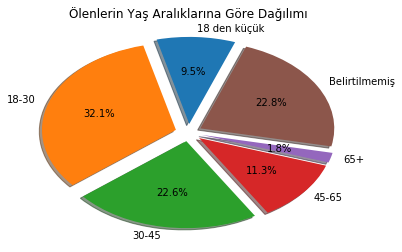

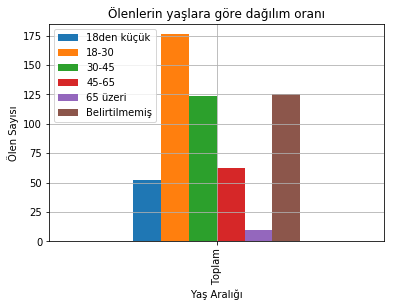

In [27]:
pie(['18 den küçük','18-30','30-45','45-65','65+', 'Belirtilmemiş'],[yaş_dağılımı.iloc[0,0],yaş_dağılımı.iloc[0,1],yaş_dağılımı.iloc[0,2],yaş_dağılımı.iloc[0,3],yaş_dağılımı.iloc[0,4],yaş_dağılımı.iloc[0,5]],'Ölenlerin Yaş Aralıklarına Göre Dağılımı',(0.1,0.1,0.1,0.1,0.1,0.1))    
yaş_dağılımı_plot(yaş_dağılımı,'Ölenlerin yaşlara göre dağılım oranı')

SONUÇ: Ölenlerin çoğunun genç olduğu gözlemlenmekle beraber yaşı belirtilmeyen ya da belirlenemeyen ölen yolcu sayısının da bir hayli fazla olduğu gözlemlenmiştir. 
Burada yolculuk yapanların yaşlarına göre ölüm oranlarını saptamak faydalı olacaktır. örn 65 üstü ölenlerin oranı gibi. Bu sayede ölenlerin yaşlarıyla orantısı bulunabilir. Ayrıca bunun korelasyonuna da bakmakta fayda var
Soru 7--> Korelasyon: yaş-ölüm

Bunu bir de pie yapalım.

### SORU 3. Ölen Erkeklerin Yaş Aralığı

In [28]:
ölü_erkek.describe() # sadece inceledik.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,468.0,468.000000,360.000000,468.000000,468.000000,468.000000
mean,0.0,2.476496,31.618056,0.440171,0.207265,21.960993
std,0.0,0.761411,14.056019,1.138507,0.601382,32.409799
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.750000,0.000000,0.000000,7.795800
50%,0.0,3.000000,29.000000,0.000000,0.000000,9.416650
75%,0.0,3.000000,39.250000,0.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,5.000000,263.000000


In [29]:
yaş_dağılımı.loc['Toplam']=yaş_aralığı(ölü_erkek)
yaş_dağılımı

,18den küçük,18-30,30-45,45-65,65 üzeri,Belirtilmemiş,Total
Toplam,35,151,109,55,10,108,468


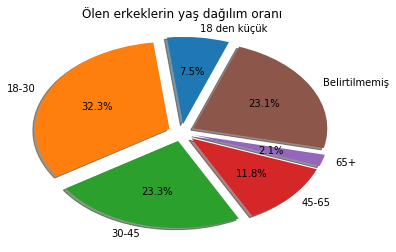

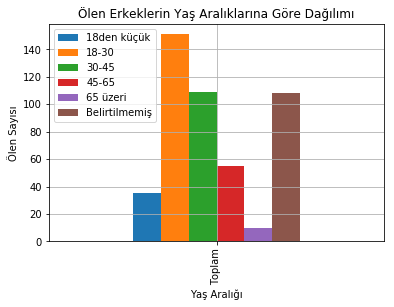

In [30]:
pie(['18 den küçük','18-30','30-45','45-65','65+', 'Belirtilmemiş'],[yaş_dağılımı.iloc[0,0],yaş_dağılımı.iloc[0,1],yaş_dağılımı.iloc[0,2],yaş_dağılımı.iloc[0,3],yaş_dağılımı.iloc[0,4],yaş_dağılımı.iloc[0,5]],'Ölen erkeklerin yaş dağılım oranı',(0.1,0.1,0.1,0.1,0.1,0.1))
yaş_dağılımı_plot(yaş_dağılımı,'Ölen Erkeklerin Yaş Aralıklarına Göre Dağılımı')

### SORU 5. Ölenlerin sınıflara göre dağılımı

In [31]:
def histogram_sticked(veri1,veri2,title,labelx,labely):
    veri1.hist()
    veri2.hist()
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

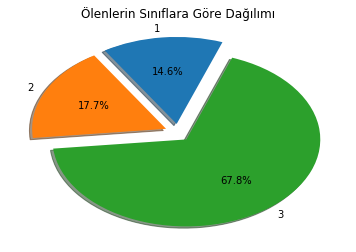

In [32]:
pie(['1','2','3'],[len(ölenler[ölenler['Pclass'] == 1]),len(ölenler[ölenler['Pclass'] == 2]),len(ölenler[ölenler['Pclass'] == 3])],'Ölenlerin Sınıflara Göre Dağılımı')

In [33]:
ölenler=ölü_erkek.append(ölü_kadın)
ölenler.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


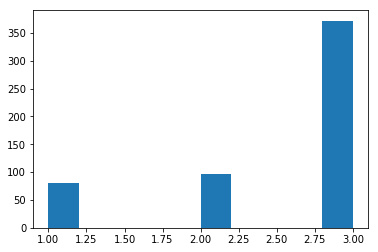

In [34]:
plt.hist(ölenler['Pclass'])
plt.show()

Bir diğer gösterim 

 Gemiye binenlerin ve ölenlerin sınıflara göre dağılımı

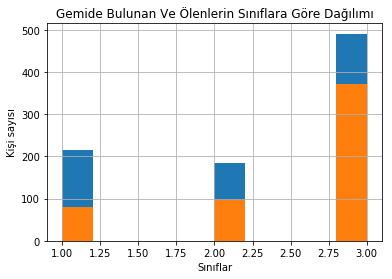

In [35]:
histogram_sticked(titanic['Pclass'],ölenler['Pclass'],'Gemide Bulunan Ve Ölenlerin Sınıflara Göre Dağılımı','Sınıflar','Kişi sayısı')

SONUÇ: Grafikten de anlaşılacağı üzere ölenlerin çoğu 3. sınıftan ve 1. sınıfta yolcu sayısı az olmasına karşın kurtulan insan sayısı diğerlerinden kurtulan insan sayısından fazla.

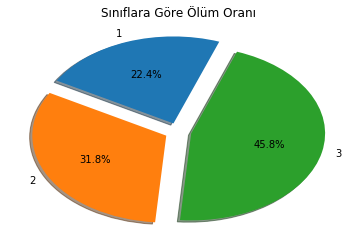

In [36]:
pie(['1','2','3'],[len(ölenler[ölenler['Pclass'] == 1])/len(titanic[titanic['Pclass'] == 1]),len(ölenler[ölenler['Pclass'] == 2])/len(titanic[titanic['Pclass'] == 2]),len(ölenler[ölenler['Pclass'] == 3])/len(titanic[titanic['Pclass'] == 3])],'Sınıflara Göre Ölüm Oranı')

Buradan da görüldüğü üzere bariz bir farkla 3. sınıfın daha çok öldüğü görülüyor.

### SORU 6. Ölenlerin Limanlara Göre Dağılımı

In [37]:
#Bize data dict dosyasında anlatmış ama yine de kontrol edelim. titanicteki limaların sayısına bakıyoruz.
limanlar=titanic['Embarked'].value_counts()
limanlar

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
#Sonra bunların toplamına bakıyoruz
limanlar.sum()

889

In [39]:
limanlar=pd.DataFrame(limanlar)
limanlar

,Embarked
S,644
C,168
Q,77


In [40]:
ölenler_liman=pd.DataFrame(ölenler['Embarked'].value_counts())
ölenler_liman

,Embarked
S,427
C,75
Q,47


In [41]:
#2 kişi farklı görünüyor. Titanicte 891 yolcu olduğuna göre.Bunların limanlarında ne yazdığına bakalım.
for passenger in titanic['Embarked']:
    if passenger=='C' or passenger=='S' or passenger=='Q':
        pass
    else:
        print(passenger)

nan
nan


In [42]:
def bar(veri,xlabel,ylabel,title):
    veri.plot(kind='bar',grid=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

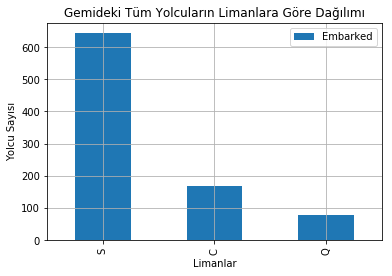

In [43]:
bar(limanlar,"Limanlar","Yolcu Sayısı",'Gemideki Tüm Yolcuların Limanlara Göre Dağılımı')

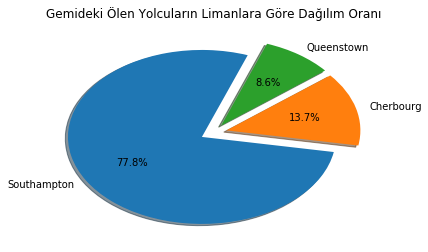

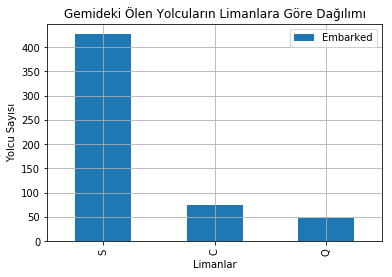

In [44]:
pie(['Southampton','Cherbourg','Queenstown'],[ölenler_liman.loc['S'],ölenler_liman.loc['C'],ölenler_liman.loc['Q']],'Gemideki Ölen Yolcuların Limanlara Göre Dağılım Oranı',explode=(0.1,0.1,0.1))
bar(ölenler_liman,"Limanlar","Yolcu Sayısı",'Gemideki Ölen Yolcuların Limanlara Göre Dağılımı')

In [45]:
ölenler_liman

,Embarked
S,427
C,75
Q,47


Limanların ölüm oranlarını yani hangi limanda daha fazla ölüm oranı olduğuna yönelik inceleyelim.

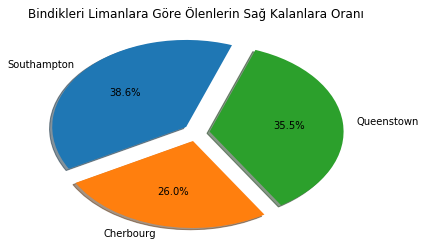

In [46]:
pie(['Southampton','Cherbourg','Queenstown'],[ölenler_liman.loc['S']/limanlar.loc['S'],ölenler_liman.loc['C']/limanlar.loc['C'],ölenler_liman.loc['Q']/limanlar.loc['Q']],'Bindikleri Limanlara Göre Ölenlerin Sağ Kalanlara Oranı',explode=(0.1,0.1,0.1))

SONUÇ: Grafikten görüldüğü üzere ölenlerin en fazla S en az C limanından binenler olduğunu gördük. Bu durum aklımıza 'Acaba S dan binenler C den binenlere göre daha mı düşük sınıftandı' sorusunu getirdi. 

Bu grafik limanların ayrı ayrı ölüm oranları değil, bunların birbirine oranıdır. Yani S limanının ölüm oranı 38,5 değildir yaklaşık 66,.. dür. Ancak diğer limanlarla aralarında nasıl bir ölüm oranlaması var ona baktık. Bu durum sonucumuzu değiştirmez!!!

In [47]:
import scipy

In [48]:
scipy.stats.chisquare(titanic['Survived'].value_counts())

Power_divergenceResult(statistic=48.090909090909093, pvalue=4.0690871289683173e-12)

In [49]:
scipy.stats.chisquare(titanic['Embarked'].value_counts())

Power_divergenceResult(statistic=625.81102362204729, pvalue=1.2789773792558722e-136)

In [50]:
cont = pd.crosstab(titanic['Survived'],titanic['Embarked'])

In [51]:
scipy.stats.chi2_contingency(cont)

(26.489149839237619,
 1.769922284120912e-06,
 2,
 array([[ 103.7480315,   47.5511811,  397.7007874],
        [  64.2519685,   29.4488189,  246.2992126]]))

### SPEARMAN'S R Metoduyla İncelemeler
Bu yöntemde nonnumeric ve categorical datalar sınıflandırılarak numaralar verilir ve ilişkili olup olmadıklarına bakılır.

In [52]:
from scipy.stats import spearmanr

In [53]:
spearmanr(titanic['Survived'],titanic['Pclass'])

SpearmanrResult(correlation=-0.33966793665005257, pvalue=1.6876081409966053e-25)

SONUÇ: R değeri -0.33 çıktı. Sıfıra yakınsa ilişkisiz noncorrelated denir. Bu yüzden aralarında negatif küçük bir ilişki var. Yani Sınıf sayısı arttıkça hayatta kalma azalmış tezimizi doğruladık. 

In [54]:
spearmanr(titanic['Survived'],titanic['Sex'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.54335138065775512, pvalue=1.4060661308802594e-69)

0:female   0:Died
1:male     1:Survived
Farzederek yapılan testte cinsiyet ve hayatta kalma arasında ters ilişki olduğu gözlemlenmiştir. Yani kadınların erkeklere göre daha fazla hayatta kaldığı gözlemlenmiştir.

### CHI SQUARE INDEPENDENCE TEST

In [55]:
scipy.stats.chisquare(titanic['Survived'].value_counts())

Power_divergenceResult(statistic=48.090909090909093, pvalue=4.0690871289683173e-12)

In [56]:
scipy.stats.chisquare(titanic['Sex'].value_counts())

Power_divergenceResult(statistic=77.630751964085292, pvalue=1.2422095313910336e-18)

In [57]:
cont = pd.crosstab(titanic['Survived'],titanic['Sex'])

In [58]:
scipy.stats.chi2_contingency(cont)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

Burada
chi2:260,7
p val=1.19
dof=1
expected= array[...]

çıktı. P değeri 0.5 üzerinde olanlarda Ho hipotezi kabul edilir. Yani ölümle cinsiyet bağımsız değişkenlerdir.

### Yaş korelasyonu inclemeye çalışıyoruz

In [59]:
titanic2['Age_Cat']=pd.Series()

In [60]:
titanic2=titanic2.dropna(subset=['Age']) #Yaşı olmayanları çıkardık.

In [61]:
len(titanic2)

714

In [62]:
def yaş_kategorisi(veri):
 
    for index,row in veri.iterrows():
       
        if row['Age'] < 18:
            veri.set_value(index,'Age_Cat',1)
        
        elif row['Age'] < 30:
            veri.set_value(index,'Age_Cat',2)
        
        elif row['Age'] < 45:
            veri.set_value(index,'Age_Cat',3)
        
        elif row['Age'] < 65:
            veri.set_value(index,'Age_Cat',4)
        
        elif 65 <= row['Age']:
            veri.set_value(index,'Age_Cat',5)
        

In [63]:
yaş_kategorisi(titanic2)

In [64]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0


In [65]:
titanic2['Age_Cat']=titanic2['Age_Cat'].astype(int) # integera çevirdik

In [66]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [67]:
spearmanr(titanic2['Age'],titanic2['Survived'])

SpearmanrResult(correlation=-0.052565300044694493, pvalue=0.1605885518114008)

SONUÇ: Görüldüğü üzere çok zayıf bir ilişki söz konusu. Yani yaşın artmasıyla ölüm azalıyor çok az bir oranda.

In [68]:
spearmanr(titanic2['Age'],titanic2['Sex'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.083330331345633071, pvalue=0.025972435216361289)

SONUÇ: Yaşla cinsiyet arasında pozitif ama yok denecek kadar az bir bağlantı var. Önemsiz sayılabilir.

## !!!!!!ÖNEMLİ!!!!!
365 CAREERS E SORDUM.YAŞ-CİNSİYET VEYA CİNSİYET-ÖLÜM GİBİ İNCELEMELER İÇİN SPEARMAN's R UYGUN MU DİYE. YAŞ-CİNSİYET İÇİN CRAMER's V YÖNTEMİNİ DENEMEMİ, BUNUN DAHA İYİ OLACAĞINI SÖYLEDİ.

NE OLDUĞU:http://changingminds.org/explanations/research/analysis/cramers_v.htm

NASIL UYGULANACAĞI: https://gist.github.com/dtemkin/04e653c8f19e8ac0c4965b797ba2af2b

AYRICA ÖLÜM-CİNSİYET İÇİN DE PHİ CORRELATİON DAHA İYİ OLACAĞINI BULDUM
http://changingminds.org/explanations/research/analysis/phi.htm